In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab    
import json
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import norm,geom
# np.seterr(divide='ignore', invalid='ignore')

In [2]:
new_business = pd.read_csv('new_business.csv')

In [3]:
new=[]
for index, columns in new_business.iterrows():
    new_categories = str(columns['categories']).lower() 
    Id = columns['business_id']
    State=columns['state']
    City = columns['city']
    Stars = columns['stars']
    Review = columns['review_count']
    
    if "fast food" in new_categories:
         new.append({"ID":Id,"New":new_categories,"State":State,"City":City,"Stars":Stars,"Review":Review})
        

In [4]:
Type=pd.DataFrame(new)

In [5]:
AZ_df = Type[Type.State=='AZ']
NC_df = Type[Type.State=='NC']
NV_df = Type[Type.State=='NV']


In [9]:
Type.State.value_counts()

AZ     1385
NV      881
NC      310
EDH     165
QC      117
PA       91
WI       88
BW       34
IL       31
ON       24
SC       18
MLN       6
NW        1
FIF       1
AK        1
Name: State, dtype: int64

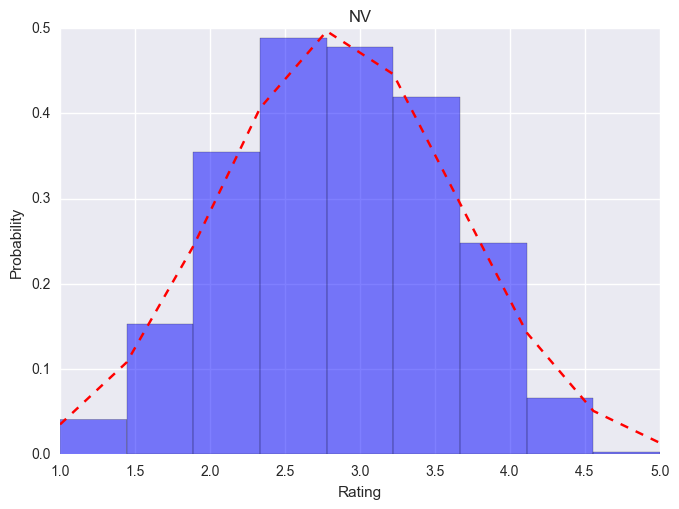

NameError: name 'sigma' is not defined

In [10]:
num_bins = 9   
# the histogram of the data    
n, bins, patches = plt.hist(NV_df.Stars.values, num_bins, normed=1, facecolor='blue', alpha=0.5)    
  
# add a 'best fit' line 
mu, std = norm.fit(NV_df.Stars)

y = mlab.normpdf(bins, mu, std)    
plt.plot(bins, y, 'r--')    
plt.xlabel('Rating')    
plt.ylabel('Probability')    
plt.title('NV')    
    
# Tweak spacing to prevent clipping of ylabel    
plt.subplots_adjust(left=0.15)    
plt.show() 

def skewness(data):
    a=(data-data.mean())**3
    E3=a.mean()
    sigma3=data.std()**3
    return E3/sigma3

def kurtosis(data):
    a=(data-data.mean())**4
    E4=a.mean()
    sigma4=data.std()**4
    return E4/sigma4
    
skewnees=skewness(NV_df.Stars.values)
kurtosis=kurtosis(NV_df.Stars.values)

print ("mean:",mu,"\n"
       "standard deviation:",sigma,"\n"
        "skewnees:", skewnees,"\n"
       "kurtosis:", kurtosis)

In [45]:
sum(n)

2.2500000000000004

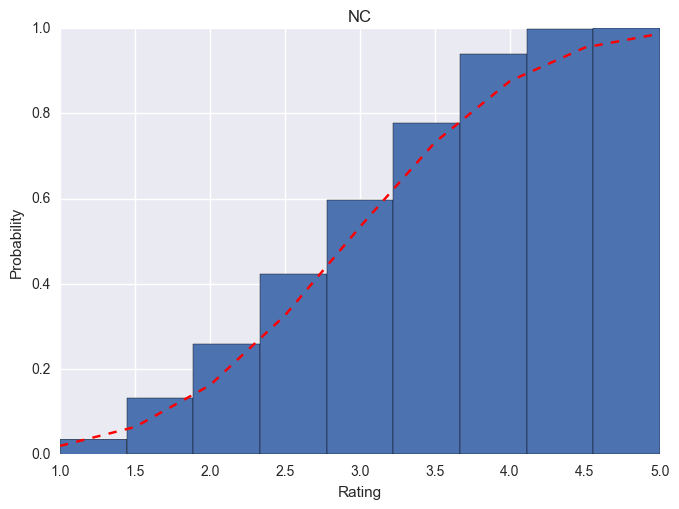

mean: 2.920967741935484 
standard deviation: 0.9344428963099563 
skewnees: -0.177777980271 
kurtosis: 2.15646237354


In [12]:
num_bins = 9   
# the histogram of the data    
plt.hist(NC_df.Stars.values, num_bins, normed=1, cumulative=True)    
  
# add a 'best fit' line 
mu=NC_df.Stars.mean()
sigma=NC_df.Stars.std()

bins = np.linspace(1, 5, 9)
cdf_fitted = norm.cdf(bins,mu,sigma)

plt.plot(bins, cdf_fitted, 'r--')    
plt.xlabel('Rating')    
plt.ylabel('Probability')    
plt.title('NC')    
    
# Tweak spacing to prevent clipping of ylabel    
plt.subplots_adjust(left=0.15)    
plt.show()
def skewness(data):
    a=(data-data.mean())**3
    E3=a.mean()
    sigma3=data.std()**3
    return E3/sigma3

def kurtosis(data):
    a=(data-data.mean())**4
    E4=a.mean()
    sigma4=data.std()**4
    return E4/sigma4
    
skewnees=skewness(NC_df.Stars.values)
kurtosis=kurtosis(NC_df.Stars.values)

print ("mean:",mu,"\n"
       "standard deviation:",sigma,"\n"
        "skewnees:", skewnees,"\n"
       "kurtosis:", kurtosis)

In [154]:
bins

array([ 1.        ,  1.44444444,  1.88888889,  2.33333333,  2.77777778,
        3.22222222,  3.66666667,  4.11111111,  4.55555556,  5.        ])

In [68]:

bins = np.linspace(1, 5, 9)
bins

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [15]:
citynames=['AZ','NC','NV']

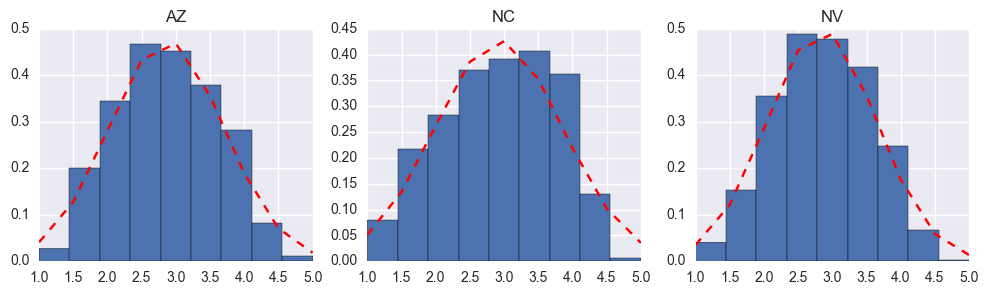

In [16]:
fig, axs = plt.subplots(1,3, figsize=(12, 3), facecolor='w', edgecolor='b')
fig.subplots_adjust(hspace = .3, wspace=.2)
bins = np.linspace(1, 5, 9)
axs = axs.ravel()
   
data = [AZ_df.Stars]
axs[0].hist(data,9,normed =1)
param = stats.norm.fit(AZ_df.Stars)
pdf_fitted = norm.pdf(bins,loc=param[0],scale=param[1])
axs[0].plot(bins,pdf_fitted , 'r--')

data = [NC_df.Stars]
axs[1].hist(data,9,normed =1)
param = stats.norm.fit(data)
pdf_fitted = norm.pdf(bins,loc=param[0],scale=param[1])
axs[1].plot(bins,pdf_fitted , 'r--')

data = [NV_df.Stars]
axs[2].hist(data,9,normed =1)
param = stats.norm.fit(data)
pdf_fitted = norm.pdf(bins,loc=param[0],scale=param[1])
axs[2].plot(bins,pdf_fitted , 'r--')

for i in range(len(citynames)):
    name = citynames[i]
    axs[i].set_title(name)


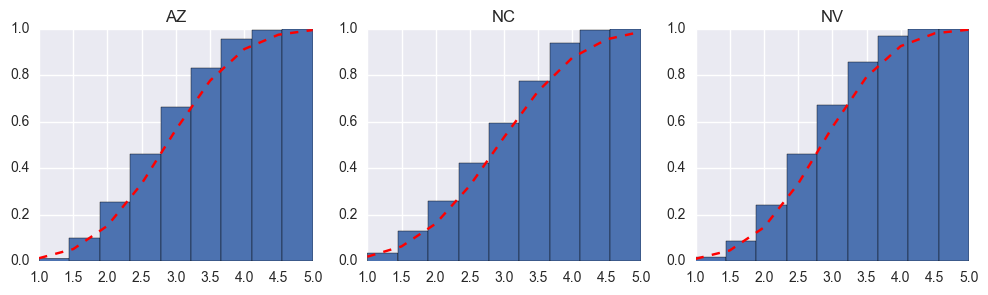

In [17]:
fig, axs = plt.subplots(1,3, figsize=(12, 3), facecolor='w', edgecolor='b')
fig.subplots_adjust(hspace = .3, wspace=.2)
bins = np.linspace(1, 5, 9)
axs = axs.ravel()
   
data = [AZ_df.Stars]
axs[0].hist(data,9,normed =1,cumulative=True)
param = norm.fit(AZ_df.Stars)
cdf_fitted = norm.cdf(bins,loc=param[0],scale=param[1])
axs[0].plot(bins,cdf_fitted , 'r--')

data = [NC_df.Stars]
axs[1].hist(data,9,normed =1,cumulative=True)
param = norm.fit(data)
cdf_fitted = norm.cdf(bins,loc=param[0],scale=param[1])
axs[1].plot(bins,cdf_fitted , 'r--')

data = [NV_df.Stars]
axs[2].hist(data,9,normed =1,cumulative=True)
param = norm.fit(data)
cdf_fitted = norm.cdf(bins,loc=param[0],scale=param[1])
axs[2].plot(bins,cdf_fitted , 'r--')

for i in range(len(citynames)):
    name = citynames[i]
    axs[i].set_title(name)


In [123]:
bins

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [330]:
pmf_NV = NV_df.Stars.value_counts().sort_index() / len(NV_df.Stars)
cdf_NV = np.cumsum(pmf_NV)


In [341]:
cdf_NV

1.0    0.018161
1.5    0.086266
2.0    0.244041
2.5    0.460840
3.0    0.673099
3.5    0.859251
4.0    0.969353
4.5    0.998865
5.0    1.000000
Name: Stars, dtype: float64

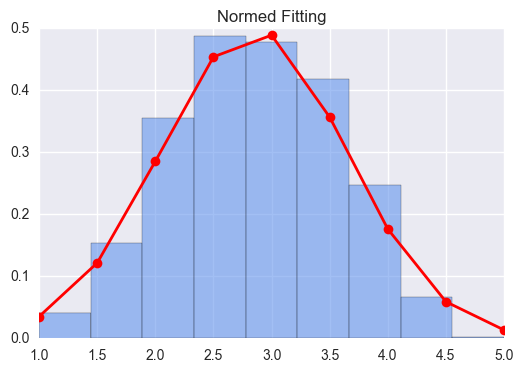

In [185]:
mu, std = norm.fit(NV_df.Stars)

plt.hist(NV_df.Stars.values,bins=9, normed=True, alpha=0.6, color='#6495ED')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 9)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'ro-', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title("Normed Fitting")
plt.show()